In [1]:
import pandas as pd
import numpy as np

In [2]:
original = pd.read_excel("Reduced Features for TAI project.xlsx")

In [3]:
original

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [4]:
original.isna().sum()

Patient ID                                 0
original_shape_Elongation                  0
original_firstorder_Kurtosis               0
original_firstorder_Skewness               0
wavelet-LHL_glrlm_RunVariance              0
                                          ..
original_shape_SphericalDisproportion      0
wavelet2-HHL_glcm_Idmn                     0
wavelet2-LHH_firstorder_RootMeanSquared    0
wavelet2-HLL_firstorder_Maximum            0
Label                                      0
Length: 152, dtype: int64

The dataset has no NAN values.

In [5]:
original["Patient ID"][0]

1

In [6]:
print(original["Patient ID"].value_counts())

34    342
9     141
36    138
71    132
42    129
     ... 
95      3
1       3
91      2
87      1
81      1
Name: Patient ID, Length: 96, dtype: int64


We notice here that some patients have alot of data compared to other patients. For example patient number '34' has 342 rows of data whereas patient '81' has only 1 row of data. So we need to balance the data.

In [7]:
original_filtered = original.drop(columns=['Patient ID'])

In [8]:
original_filtered = original_filtered.T.drop_duplicates().T

In [9]:
original_filtered

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,16.208843,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0.0
1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,8.438487,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0.0
2,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,15.858577,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0.0
3,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,7.685345,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0.0
4,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,4.956038,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,3.084912,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1.0
3558,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,11.341994,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1.0
3559,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,17.657257,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1.0
3560,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,6.464167,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1.0


In [10]:
original_filtered.groupby('Label').count()

,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,wavelet-LHL_glrlm_LongRunEmphasis,...,wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum
Label,,,,,,,,,,,,,,,,,,,,,
0.0,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
1.0,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,...,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542


In [11]:
labels = original_filtered['Label']

In [12]:
labels

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3557    1.0
3558    1.0
3559    1.0
3560    1.0
3561    1.0
Name: Label, Length: 3562, dtype: float64

In [13]:
labels.count()

3562

In [14]:
unlabeled = original_filtered.drop(columns=['Label'])

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
dataset = SelectKBest(f_classif, k=140).fit_transform(unlabeled, labels)

In [16]:
len(dataset)

3562

We can see that the data from the 96 patients is balanced (46 Negative cases to 50 Negative cases)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
X_train, X_testOr, y_train, y_testOr = train_test_split(dataset, labels, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_testOr, y_testOr, test_size=0.5)

In [67]:
print(f"{len(X_train)} for training")
print(f"{len(X_val)} for validating")
print(f"{len(X_test)} for testing")

2386 for training
588 for validating
588 for testing


# SVM / SVC

In [19]:
clf = svm.SVC(kernel='linear', gamma='auto', probability=True)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])

In [20]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear', probability=True))])

In [21]:
y_pred_svm = pipe.predict(X_test)
y_pred_svm_proba = pipe.predict_proba(X_test)[:,1]

In [22]:
confusion_matrix(y_test, y_pred_svm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.7619047619047619
Precision: 0.7897435897435897
Recall: 0.6086956521739131


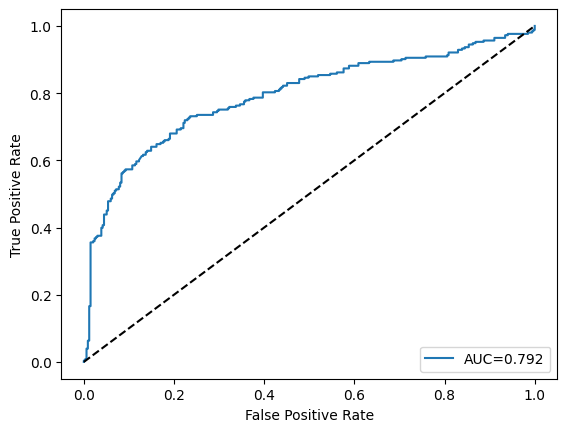

In [23]:
auc = metrics.roc_auc_score(y_test, y_pred_svm_proba)
auc = "{:.3f}".format(auc)
fprSVC, tprSVC, _ = metrics.roc_curve(y_test, y_pred_svm_proba)
plt.plot(fprSVC, tprSVC, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [24]:
print(classification_report(y_test, y_pred_svm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       335
           1       0.79      0.61      0.69       253

    accuracy                           0.76       588
   macro avg       0.77      0.74      0.75       588
weighted avg       0.77      0.76      0.76       588



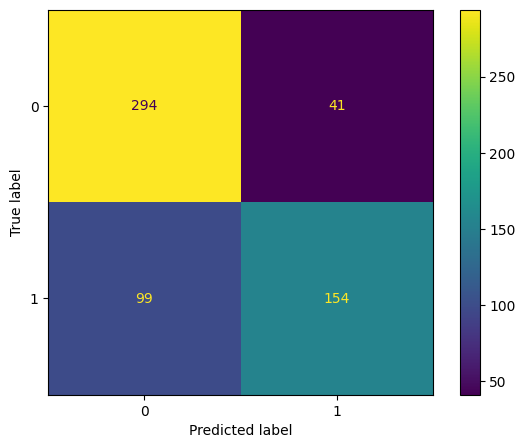

In [25]:
cm = confusion_matrix(y_test, y_pred_svm,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [26]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    clf = svm.SVC(kernel='linear', gamma='auto', probability=True)
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', clf)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.206 std: 0.004
Mean validation loss: 0.247 std: 0.017


# Logistic Regression

In [27]:
model = LogisticRegression(max_iter = 1000)
pipe = Pipeline([("preprocessor", StandardScaler()),('logReg', model)])
pipe.fit(X_train, y_train)
y_predlr = pipe.predict(X_test)
y_predlr_proba = pipe.predict_proba(X_test)[:,1]

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predlr))
print("Precision:",metrics.precision_score(y_test, y_predlr, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predlr, average='weighted'))

Accuracy: 0.7517006802721088
Precision: 0.750731609063553
Recall: 0.7517006802721088


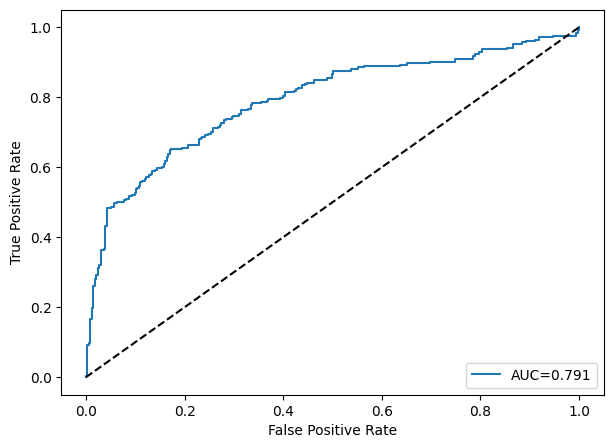

In [29]:
auc = metrics.roc_auc_score(y_test, y_predlr_proba)
auc = "{:.3f}".format(auc)
fprLR, tprLR, _ = metrics.roc_curve(y_test, y_predlr_proba)
plt.plot(fprLR, tprLR, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [30]:
print(classification_report(y_test, y_predlr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       335
           1       0.74      0.65      0.69       253

    accuracy                           0.75       588
   macro avg       0.75      0.74      0.74       588
weighted avg       0.75      0.75      0.75       588



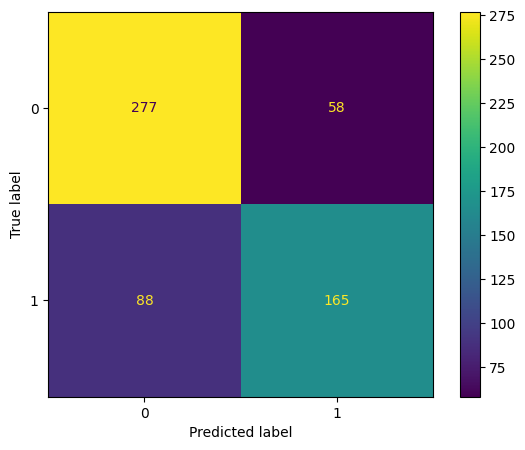

In [31]:
cm = confusion_matrix(y_test, y_predlr)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [32]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    model = LogisticRegression(max_iter = 1000)
    pipe = Pipeline([("preprocessor", RobustScaler()),('logReg', model)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.216 std: 0.005
Mean validation loss: 0.25 std: 0.016


# Bagging

In [33]:
bagging = BaggingClassifier(n_estimators=35, random_state=42)
pipe = Pipeline([("std", StandardScaler()), ('baggC', bagging)])
pipe.fit(X_train, y_train)
y_pred_bc = pipe.predict(X_test)
y_pred_bc_proba = pipe.predict_proba(X_test)[:,1]

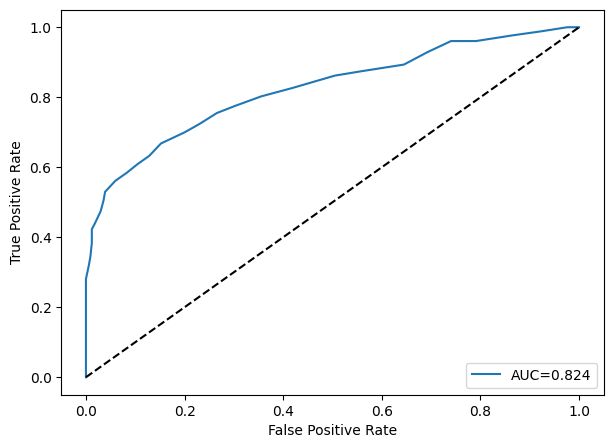

In [34]:
auc = metrics.roc_auc_score(y_test, y_pred_bc_proba)
auc = "{:.3f}".format(auc)
fprBAGGING, tprBAGGING, _ = metrics.roc_curve(y_test, y_pred_bc_proba)
plt.plot(fprBAGGING, tprBAGGING, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [35]:
print(classification_report(y_test, y_pred_bc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       335
           1       0.79      0.63      0.70       253

    accuracy                           0.77       588
   macro avg       0.77      0.75      0.76       588
weighted avg       0.77      0.77      0.76       588



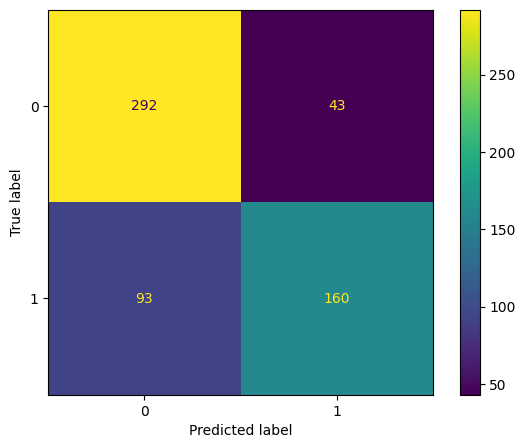

In [36]:
cm = confusion_matrix(y_test, y_pred_bc)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [37]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    bagging = BaggingClassifier(n_estimators=35, random_state=42)
    pipe = Pipeline([("std", StandardScaler()), ('baggC', bagging)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.001 std: 0.0
Mean validation loss: 0.225 std: 0.018


# Adaboost

In [38]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
pipe = Pipeline([('std', StandardScaler()), ('ada', ada)])
pipe.fit(X_train, y_train)
y_predada = pipe.predict(X_test) 
y_predada_proba = pipe.predict_proba(X_test)[:,1]

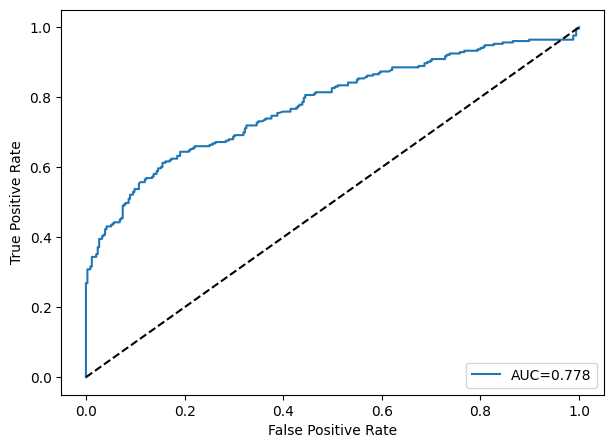

In [39]:
auc = metrics.roc_auc_score(y_test, y_predada_proba)
auc = "{:.3f}".format(auc)
fprADA, tprADA, _ = metrics.roc_curve(y_test, y_predada_proba)
plt.plot(fprADA, tprADA, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [40]:
print(classification_report(y_test, y_predada))

              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78       335
         1.0       0.72      0.62      0.67       253

    accuracy                           0.74       588
   macro avg       0.73      0.72      0.73       588
weighted avg       0.74      0.74      0.73       588



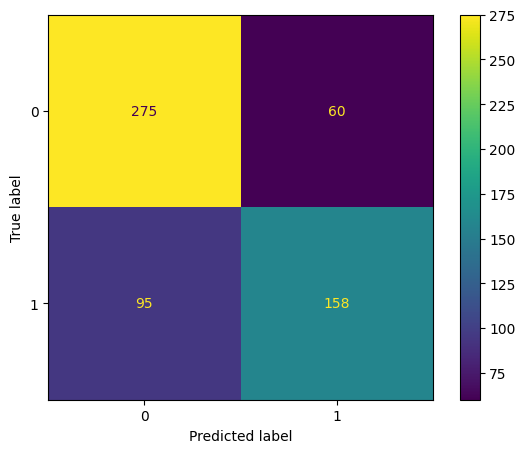

In [41]:
cm = confusion_matrix(y_test, y_predada)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [42]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    ada = AdaBoostClassifier(n_estimators=50, random_state=42)
    pipe = Pipeline([('linear_pca', StandardScaler()), ('ada', ada)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.189 std: 0.006
Mean validation loss: 0.259 std: 0.016


# XGBoost

In [73]:
model = XGBClassifier(random_state=42, n_estimators=20, booster='gblinear')
pipe = Pipeline([('scl', StandardScaler()),('xgb', model)])
pipe.fit(X_train, y_train)
y_predxg = pipe.predict(X_test)
y_predxg_proba = pipe.predict_proba(X_test)[:, 1]

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predxg))
print("Precision:",metrics.precision_score(y_test, y_predxg))
print("Recall:",metrics.recall_score(y_test, y_predxg))

Accuracy: 0.7414965986394558
Precision: 0.7416267942583732
Recall: 0.6126482213438735


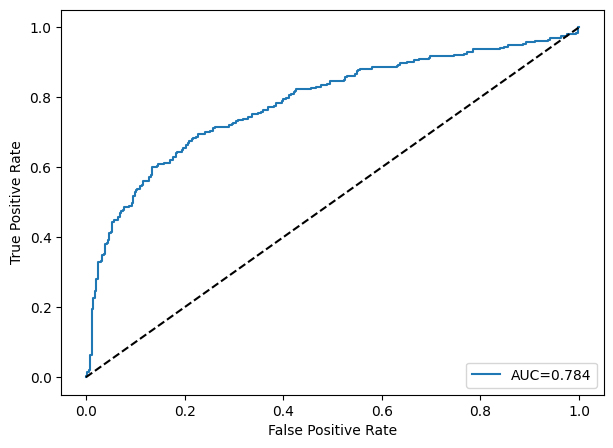

<Figure size 700x500 with 0 Axes>

In [75]:
auc = metrics.roc_auc_score(y_test, y_predxg_proba)
auc = "{:.3f}".format(auc)
fprXGB, tprXGB, _ = metrics.roc_curve(y_test, y_predxg_proba)
plt.plot(fprXGB, tprXGB, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()
plt.savefig('img/xgb.png')

In [76]:
print(classification_report(y_test, y_predxg, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       335
           1       0.74      0.61      0.67       253

    accuracy                           0.74       588
   macro avg       0.74      0.73      0.73       588
weighted avg       0.74      0.74      0.74       588



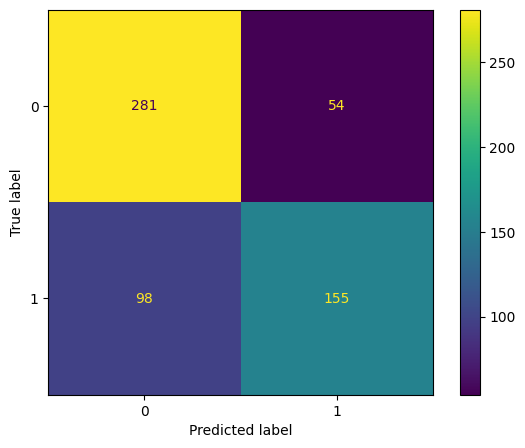

In [77]:
cm = confusion_matrix(y_test, y_predxg,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [78]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    model = XGBClassifier(random_state=42, n_estimators=30, booster='gblinear')
    pipe = Pipeline([('scl', StandardScaler()),('xgb', model)])
    pipe.fit(X_train, y_train)
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.332 std: 0.087
Mean validation loss: 0.315 std: 0.09


# Naives Bayes

In [49]:
gnb = GaussianNB()
pipe = Pipeline([("scaler", StandardScaler()),('gnb', gnb)])
pipe.fit(X_train, y_train)
y_prednb = pipe.predict(X_test)
y_prednb_proba = pipe.predict_proba(X_test)[:,1]

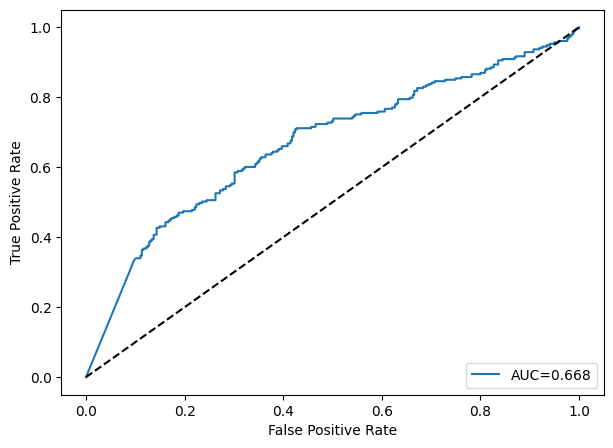

In [50]:
auc = metrics.roc_auc_score(y_test, y_prednb_proba)
auc = "{:.3f}".format(auc)
fprNB, tprNB, _ = metrics.roc_curve(y_test, y_prednb_proba)
plt.plot(fprNB, tprNB, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [51]:
print(classification_report(y_test, y_prednb, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       335
           1       0.56      0.64      0.60       253

    accuracy                           0.63       588
   macro avg       0.63      0.63      0.63       588
weighted avg       0.64      0.63      0.63       588



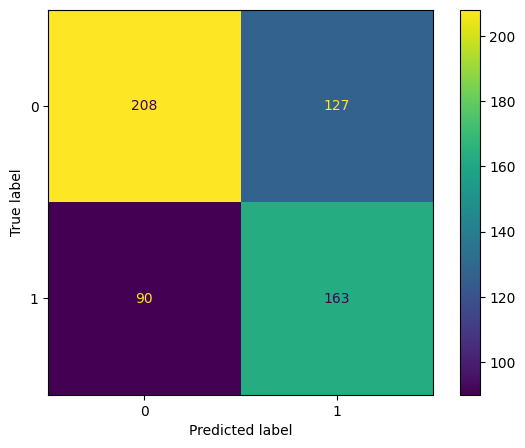

In [52]:
cm = confusion_matrix(y_test, y_prednb)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [53]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    gnb = GaussianNB()
    pipe = Pipeline([("scaler", StandardScaler()),('gnb', gnb)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.383 std: 0.005
Mean validation loss: 0.384 std: 0.021


# KNN

In [54]:
knn = KNeighborsClassifier(n_neighbors=25)

In [55]:
pipe = Pipeline([("scaler", StandardScaler()),('knn', knn)])
pipe.fit(X_train, y_train)
y_predknn = pipe.predict(X_test)
y_predknn_proba = pipe.predict_proba(X_test)[:,1]

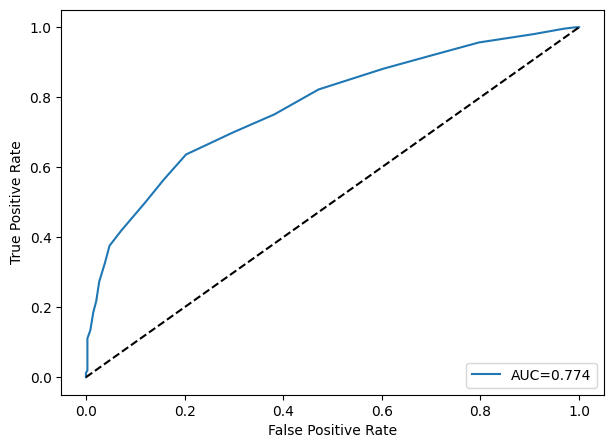

In [56]:
auc = metrics.roc_auc_score(y_test, y_predknn_proba)
auc = "{:.3f}".format(auc)
fprKNN, tprKNN, _ = metrics.roc_curve(y_test, y_predknn_proba)
plt.plot(fprKNN, tprKNN, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [57]:
print(classification_report(y_test, y_predknn, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       335
           1       0.76      0.50      0.60       253

    accuracy                           0.72       588
   macro avg       0.73      0.69      0.69       588
weighted avg       0.72      0.72      0.70       588



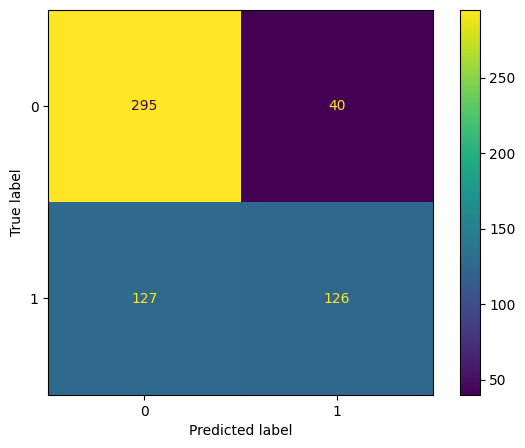

In [58]:
cm = confusion_matrix(y_test, y_predknn)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [59]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    knn = KNeighborsClassifier(n_neighbors=25)
    pipe = Pipeline([("scaler", StandardScaler()),('knn', knn)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.255 std: 0.007
Mean validation loss: 0.274 std: 0.024


# Random Forest

In [60]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [61]:
pipe = Pipeline([("scaler", StandardScaler()),('rf', rf)])
pipe.fit(X_train, y_train)
y_predrf = pipe.predict(X_test)
y_predrf_proba = pipe.predict_proba(X_test)[:,1]

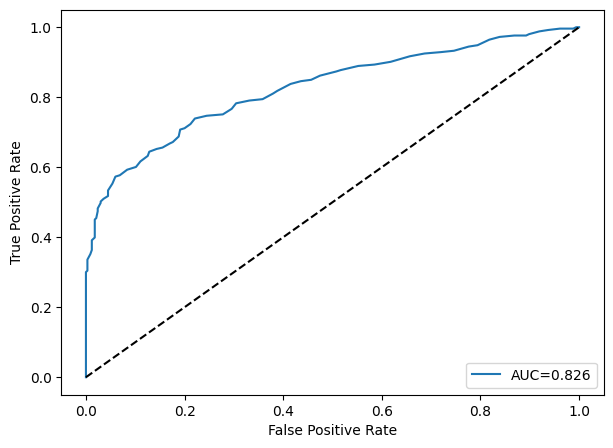

In [62]:
auc = metrics.roc_auc_score(y_test, y_predrf_proba)
auc = "{:.3f}".format(auc)
fprRF, tprRF, _ = metrics.roc_curve(y_test, y_predrf_proba)
plt.plot(fprRF, tprRF, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [63]:
print(classification_report(y_test, y_predrf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       335
           1       0.79      0.63      0.70       253

    accuracy                           0.77       588
   macro avg       0.78      0.75      0.76       588
weighted avg       0.77      0.77      0.77       588



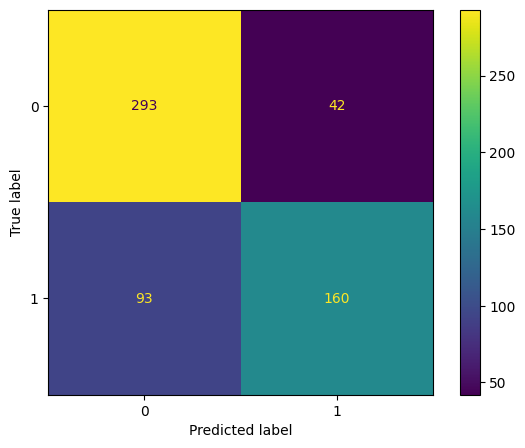

In [64]:
cm = confusion_matrix(y_test, y_predrf)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

In [65]:
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    # create an new linreg model, untrained
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    pipe = Pipeline([("scaler", StandardScaler()),('rf', rf)])
    # train the model on a subset of the training data
    pipe.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = pipe.predict(X_trainval[train_indexes])
    y_hat_val_temp = pipe.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.0 std: 0.0
Mean validation loss: 0.223 std: 0.017


# Benchmark

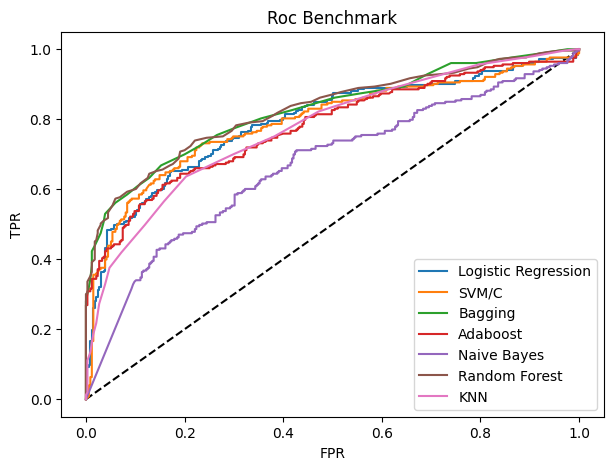

In [66]:
plt.plot([0,1],[0,1], "k--")
plt.plot(fprLR, tprLR, label= "Logistic Regression")
plt.plot(fprSVC, tprSVC, label= "SVM/C")
plt.plot(fprBAGGING, tprBAGGING, label= "Bagging")
plt.plot(fprADA, tprADA, label= "Adaboost")
plt.plot(fprNB, tprNB, label= "Naive Bayes")
plt.plot(fprRF, tprRF, label= "Random Forest")
plt.plot(fprKNN, tprKNN, label= "KNN")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Roc Benchmark')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()